# 1. 로지스틱 회귀(Logistic Regression)

## 2. 시그모이드 함수(Sigmoid function)

In [3]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### 1. W가 1이고 b가 0인 그래프

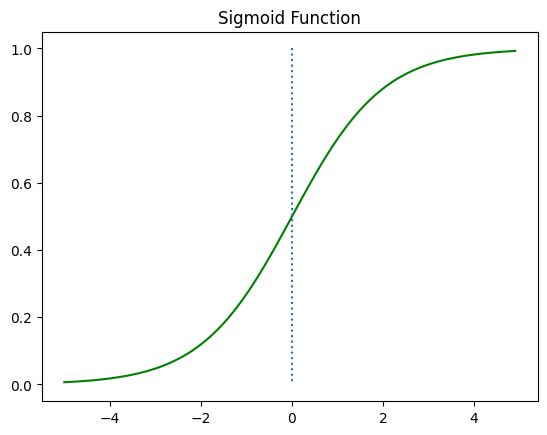

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 2. W값의 변화에 따른 경사도의 변화

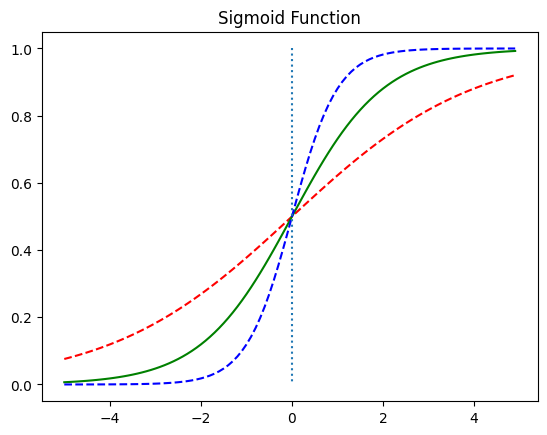

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 3. b값의 변화에 따른 좌, 우 이동

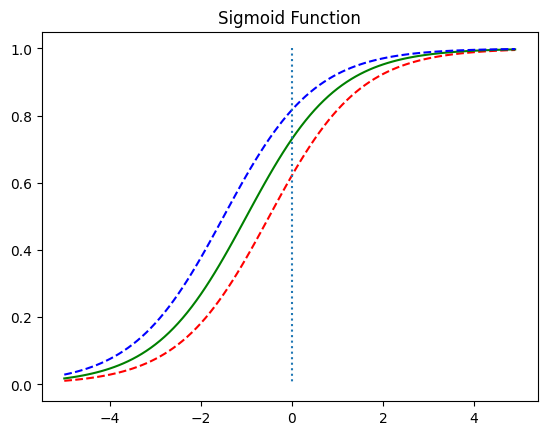

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


## 4. 파이토치로 로지스틱 회귀 구현하기

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
torch.manual_seed(1)

In [10]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [11]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [12]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [13]:
h = 1 / (1+torch.exp(-(x_train.matmul(W) + b)))

In [14]:
print(h)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [15]:
h = torch.sigmoid(x_train.matmul(W) + b) # w=0, b=0 이면 sigmoid 값은 0.5이다

In [17]:
print(h)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [20]:
-(y_train[0] * torch.log(h[0]) + (1 - y_train[0]) * torch.log(1 - h[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [21]:
losses = -(y_train * torch.log(h) + (1 - y_train) * torch.log(1 - h))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [22]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [24]:
F.binary_cross_entropy(h, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [25]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)


In [26]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))


Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [27]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)


tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [28]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [29]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
